In [134]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from collections import defaultdict
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from matplotlib.axes._subplots.Axes3DSubplot


from sklearn.pipeline import Pipeline

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
df = pd.read_csv('train_pronto.csv')
test = pd.read_csv('test_pronto.csv')

In [3]:
df.head()

,Unnamed: 0,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,weekend,afternoon,morning,evening,night,cat_weekend,cat_weekday
0,1,23.18,27.2720,426.0,721.25,0.004793,1,weekday,1,0,0,0,0,1
1,2,23.15,27.2675,429.5,714.00,0.004783,1,weekday,1,0,0,0,0,1
2,3,23.15,27.2450,426.0,713.50,0.004779,1,weekday,1,0,0,0,0,1
3,4,23.15,27.2000,426.0,708.25,0.004772,1,weekday,1,0,0,0,0,1
4,5,23.10,27.2000,426.0,704.50,0.004757,1,weekday,1,0,0,0,0,1


In [4]:
df.describe()

,Unnamed: 0,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,afternoon,morning,evening,night,cat_weekend,cat_weekday
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,4072.000000,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330,0.229522,0.239961,0.221049,0.309468,0.353678,0.646199
std,2350.825954,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982,0.420551,0.427085,0.414979,0.462303,0.478140,0.478178
min,1.000000,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2036.500000,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4072.000000,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,6107.500000,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,8143.000000,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.drop(['weekend', 'Unnamed: 0'], axis = 1, inplace = True)

In [6]:
test.head()

,Unnamed: 0,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,afternoon,morning,evening,night,cat_weekend,cat_weekday
0,0,21.7600,31.133333,437.333333,1029.666667,0.005021,1,1,0,0,0,0,1
1,1,21.7900,31.000000,437.333333,1000.000000,0.005009,1,1,0,0,0,0,1
2,2,21.7675,31.122500,434.000000,1003.750000,0.005022,1,1,0,0,0,0,1
3,3,21.7675,31.122500,439.000000,1009.500000,0.005022,1,1,0,0,0,0,1
4,4,21.7900,31.133333,437.333333,1005.666667,0.005030,1,1,0,0,0,0,1


In [7]:
test.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [8]:
y_name = 'Occupancy'
attributes = [col for col in df.columns if col != y_name]
X = df[attributes].values
y = df[y_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [9]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [10]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [-1.30740146e-01 -2.60468913e-02  1.85418846e-03  2.41581179e-04
  1.53062127e+02  2.63709406e-02 -2.22298869e-02  6.00397092e-03
 -1.01450244e-02 -7.09988373e-02  7.09988373e-02]
Intercept: 
 2.5991548260120605


In [12]:
y_pred = reg.predict(X_test)

In [13]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.883
MSE: 0.020
MAE: 0.084


In [14]:
X_train.T[4].min()

0.00267789158376215

In [15]:
X_train.T[4].max()

0.00646433289198431

In [16]:
df.HumidityRatio.min()

0.00267412691390407

In [17]:
df.HumidityRatio.max()

0.00647601323671025

## LINEAR REGRESSION IN TWO DIMENSIONS FOR EACH ATTRIBUTE AND OCCUPANCY

### TEMPERATURE

In [18]:
reg = LinearRegression()
reg.fit(X_train.T[0].reshape(-1, 1), y_train)
y_pred = reg.predict(X_test.T[0].reshape(-1, 1))

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.315
MSE: 0.114
MAE: 0.256


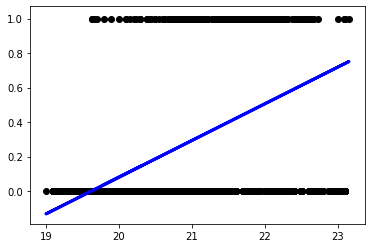

In [19]:
plt.scatter(X_test.T[0], y_test,  color='black')
plt.plot(X_test.T[0], y_pred, color='blue', linewidth=3)
plt.show()

### HUMIDITY

In [20]:
reg = LinearRegression()
reg.fit(X_train.T[1].reshape(-1, 1), y_train)
y_pred = reg.predict(X_test.T[1].reshape(-1, 1))

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.027
MSE: 0.162
MAE: 0.328


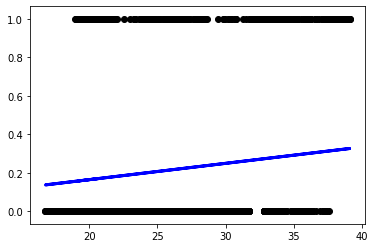

In [21]:
plt.scatter(X_test.T[1], y_test,  color='black')
plt.plot(X_test.T[1], y_pred, color='blue', linewidth=3)
plt.show()

### LIGHT

In [22]:
reg = LinearRegression()
reg.fit(X_train.T[2].reshape(-1, 1), y_train)
y_pred = reg.predict(X_test.T[2].reshape(-1, 1))

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.837
MSE: 0.027
MAE: 0.078


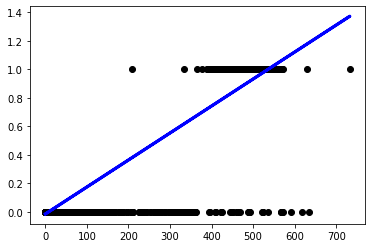

In [23]:
plt.scatter(X_test.T[2], y_test,  color='black')
plt.plot(X_test.T[2], y_pred, color='blue', linewidth=3)
plt.show()

### CO2

In [24]:
reg = LinearRegression()
reg.fit(X_train.T[3].reshape(-1, 1), y_train)
y_pred = reg.predict(X_test.T[3].reshape(-1, 1))

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.535
MSE: 0.077
MAE: 0.179


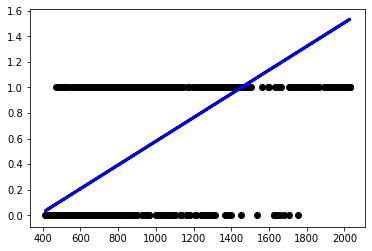

In [25]:
plt.scatter(X_test.T[3], y_test,  color='black')
plt.plot(X_test.T[3], y_pred, color='blue', linewidth=3)
plt.show()

### HUMIDITY RATIO

In [26]:
reg = LinearRegression()
reg.fit(X_train.T[4].reshape(-1, 1), y_train)
y_pred = reg.predict(X_test.T[4].reshape(-1, 1))

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.117
MSE: 0.147
MAE: 0.302


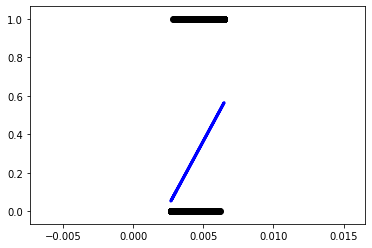

In [27]:
plt.scatter(X_test.T[4], y_test,  color='black')
plt.plot(X_test.T[4], y_pred, color='blue', linewidth=3)
plt.show()

## LASSO

In [28]:
reg = Lasso()
reg.fit(X_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [-0.          0.          0.00159811  0.00025954 -0.         -0.
 -0.          0.          0.         -0.          0.        ]
Intercept: 
 -0.13668233612673766


In [29]:
y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.857
MSE: 0.024
MAE: 0.078


### LASSO REGRESSION IN TWO DIMENSIONS FOR EACH ATTRIBUTE AND OCCUPANCY

#### TEMPERATURE

In [30]:
reg.fit(X_train.T[0].reshape(-1, 1), y_train)
y_pred = reg.predict(X_test.T[0].reshape(-1, 1))

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: -0.000
MSE: 0.167
MAE: 0.334


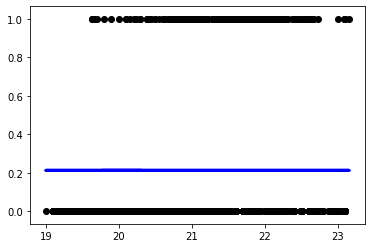

In [31]:
plt.scatter(X_test.T[0], y_test,  color='black')
plt.plot(X_test.T[0], y_pred, color='blue', linewidth=3)
plt.show()

### HUMIDITY

In [32]:
reg.fit(X_train.T[1].reshape(-1, 1), y_train)
y_pred = reg.predict(X_test.T[1].reshape(-1, 1))

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: -0.000
MSE: 0.167
MAE: 0.334


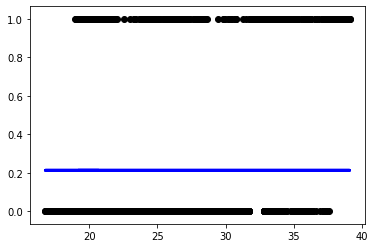

In [33]:
plt.scatter(X_test.T[1], y_test,  color='black')
plt.plot(X_test.T[1], y_pred, color='blue', linewidth=3)
plt.show()

### LIGHT

In [34]:
reg.fit(X_train.T[2].reshape(-1, 1), y_train)
y_pred = reg.predict(X_test.T[2].reshape(-1, 1))

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.836
MSE: 0.027
MAE: 0.078


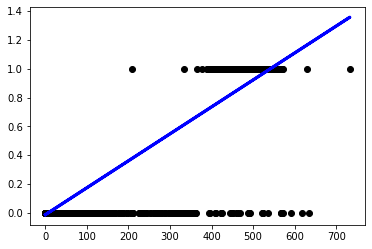

In [35]:
plt.scatter(X_test.T[2], y_test,  color='black')
plt.plot(X_test.T[2], y_pred, color='blue', linewidth=3)
plt.show()

### CO2

In [36]:
reg.fit(X_train.T[3].reshape(-1, 1), y_train)
y_pred = reg.predict(X_test.T[3].reshape(-1, 1))

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.535
MSE: 0.077
MAE: 0.180


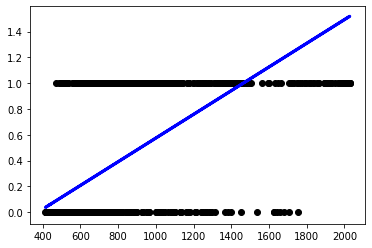

In [37]:
plt.scatter(X_test.T[3], y_test,  color='black')
plt.plot(X_test.T[3], y_pred, color='blue', linewidth=3)
plt.show()

### HUMIDITY RATIO

In [38]:
reg.fit(X_train.T[4].reshape(-1, 1), y_train)
y_pred = reg.predict(X_test.T[4].reshape(-1, 1))

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: -0.000
MSE: 0.167
MAE: 0.334


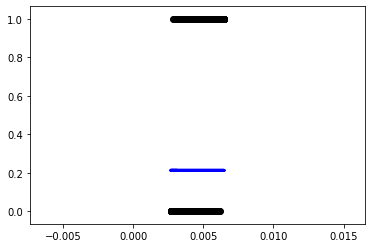

In [39]:
plt.scatter(X_test.T[4], y_test,  color='black')
plt.plot(X_test.T[4], y_pred, color='blue', linewidth=3)
plt.show()

## RIDGE REGRESSION

In [40]:
reg = Ridge()
reg.fit(X_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [-0.09743147 -0.00340087  0.00184018  0.00027157  0.00095263  0.02637316
 -0.02361737  0.00651368 -0.00926947 -0.07194368  0.07194368]
Intercept: 
 1.903947239273696


In [41]:
y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.882
MSE: 0.020
MAE: 0.084


## RIDGE REGRESSION IN TWO DIMENSIONS FOR EACH ATTRIBUTE AND OCCUPANCY

### TEMPERATURE

In [42]:
reg.fit(X_train.T[0].reshape(-1, 1), y_train)
y_pred = reg.predict(X_test.T[0].reshape(-1, 1))

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.315
MSE: 0.114
MAE: 0.256


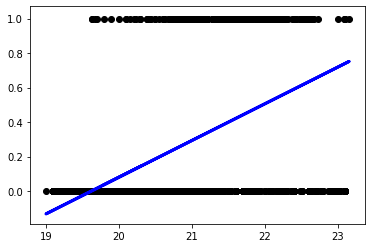

In [43]:
plt.scatter(X_test.T[0], y_test,  color='black')
plt.plot(X_test.T[0], y_pred, color='blue', linewidth=3)
plt.show()

### HUMIDITY

In [44]:
reg.fit(X_train.T[1].reshape(-1, 1), y_train)
y_pred = reg.predict(X_test.T[1].reshape(-1, 1))

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.027
MSE: 0.162
MAE: 0.328


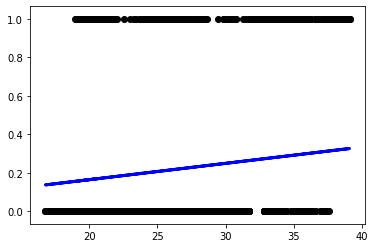

In [45]:
plt.scatter(X_test.T[1], y_test,  color='black')
plt.plot(X_test.T[1], y_pred, color='blue', linewidth=3)
plt.show()

### LIGHT

In [46]:
reg.fit(X_train.T[2].reshape(-1, 1), y_train)
y_pred = reg.predict(X_test.T[2].reshape(-1, 1))

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.837
MSE: 0.027
MAE: 0.078


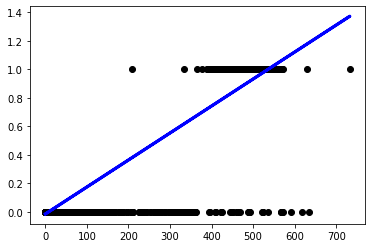

In [47]:
plt.scatter(X_test.T[2], y_test,  color='black')
plt.plot(X_test.T[2], y_pred, color='blue', linewidth=3)
plt.show()

### CO2

In [48]:
reg.fit(X_train.T[3].reshape(-1, 1), y_train)
y_pred = reg.predict(X_test.T[3].reshape(-1, 1))

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.535
MSE: 0.077
MAE: 0.179


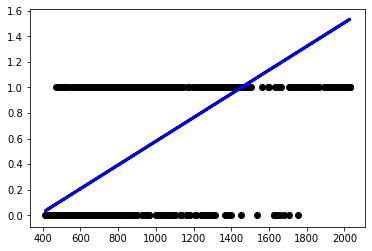

In [49]:
plt.scatter(X_test.T[3], y_test,  color='black')
plt.plot(X_test.T[3], y_pred, color='blue', linewidth=3)
plt.show()

### HUMIDITY RATIO

In [50]:
reg.fit(X_train.T[4].reshape(-1, 1), y_train)
y_pred = reg.predict(X_test.T[4].reshape(-1, 1))

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.001
MSE: 0.166
MAE: 0.334


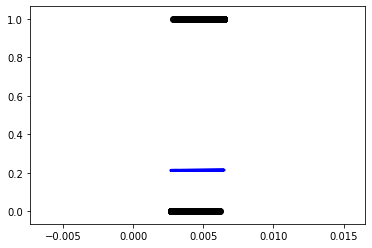

In [51]:
plt.scatter(X_test.T[4], y_test,  color='black')
plt.plot(X_test.T[4], y_pred, color='blue', linewidth=3)
plt.show()

In [52]:
### DA TUTTO STO BORDELLO VEDIAMO CHE LIGHT E CO2 SONO I PARAMETRI CHE MEGLIO SI APPLICANO PER I VARI TIPI DI REGRESSIONE

### LOGISTIC REGRESSION

In [53]:
class_name = 'Occupancy'
df = df[['Light', 'CO2', 'Humidity', 'Occupancy']]
df.head()

,Light,CO2,Humidity,Occupancy
0,426.0,721.25,27.2720,1
1,429.5,714.00,27.2675,1
2,426.0,713.50,27.2450,1
3,426.0,708.25,27.2000,1
4,426.0,704.50,27.2000,1


In [54]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report

### LIGHT

In [55]:
selected_columns = ['Light']
class_name = 'Occupancy'
attributes = [col for col in df.columns if col != class_name]
X = df[selected_columns].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [56]:
X.shape

(8143, 1)

In [57]:
X_train.shape

(5700, 1)

In [58]:
y_train.shape

(5700,)

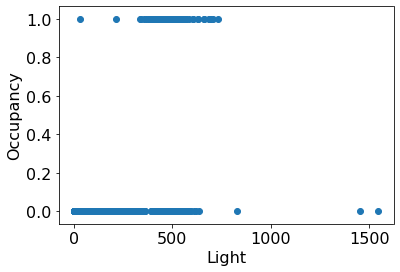

In [59]:
plt.scatter(X_train.T[0], y_train)
plt.xlabel('Light', fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
from sklearn.model_selection import GridSearchCV
pipe = Pipeline([('classifier' , LogisticRegression())])
# pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create param grid.

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['newton-cg', 'lbfgs','sag', 'saga','liblinear']},
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(X_train, y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 668 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:   50.1s finished


In [63]:
print(best_clf.best_estimator_)

Pipeline(memory=None,
         steps=[('classifier',
                 LogisticRegression(C=0.0001, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='newton-cg', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)


In [64]:
# extract best estimator

clf = LogisticRegression(C = 0.0001, class_weight = None, dual = False, fit_intercept = True, intercept_scaling = 1, l1_ratio = None, 
                         max_iter = 100, multi_class = 'auto', n_jobs = None, penalty = 'l2', random_state = 0, solver = 'newton-cg', tol = 0.0001, verbose = 0, warm_start = False)
# to test the bestfit
print(best_clf.score(X_test, y_test))
best_clf = clf.fit(X_train, y_train)

0.9823986901350799


In [65]:
y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9823986901350799
F1-score [0.98872279 0.95992544]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1924
           1       0.93      0.99      0.96       519

    accuracy                           0.98      2443
   macro avg       0.96      0.99      0.97      2443
weighted avg       0.98      0.98      0.98      2443



In [66]:
from scipy.special import expit

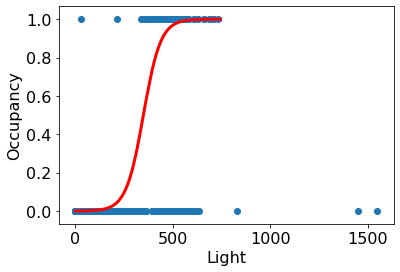

In [67]:
loss = expit(sorted(X_test) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(X_test.T[0]), loss, color='red', linewidth=3)
plt.scatter(X_train, y_train)
plt.xlabel(selected_columns[0], fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

### CO2

In [68]:
selected_columns = ['CO2']
class_name = 'Occupancy'
attributes = [col for col in df.columns if col != class_name]
X = df[selected_columns].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

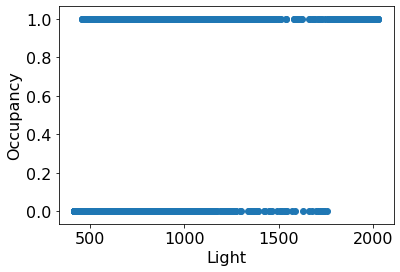

In [69]:
plt.scatter(X_train.T[0], y_train)
plt.xlabel('Light', fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [70]:
#GRIDSEARCH

pipe = Pipeline([('classifier' , LogisticRegression())])
# pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create param grid.

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['newton-cg', 'lbfgs','sag', 'saga','liblinear']},
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(X_train, y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 1500 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:   46.3s finished


In [71]:
print(best_clf.best_estimator_)

Pipeline(memory=None,
         steps=[('classifier',
                 LogisticRegression(C=0.0001, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='newton-cg', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)


In [72]:
# extract best estimator

clf = LogisticRegression(C = 0.0001, class_weight = None, dual = False, fit_intercept = True, intercept_scaling = 1, l1_ratio = None, 
                         max_iter = 100, multi_class = 'auto', n_jobs = None, penalty = 'l2', random_state = 0, solver = 'newton-cg', tol = 0.0001, verbose = 0, warm_start = False)
# to test the bestfit
print(best_clf.score(X_test, y_test))
best_clf = clf.fit(X_train, y_train)

0.904625460499386


In [73]:
y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.904625460499386
F1-score [0.94063694 0.75754422]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1924
           1       0.82      0.70      0.76       519

    accuracy                           0.90      2443
   macro avg       0.87      0.83      0.85      2443
weighted avg       0.90      0.90      0.90      2443



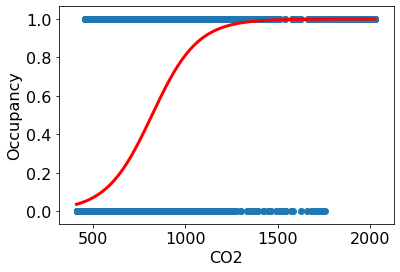

In [74]:
loss = expit(sorted(X_test) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(X_test.T[0]), loss, color='red', linewidth=3)
plt.scatter(X_train, y_train)
plt.xlabel(selected_columns[0], fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

### FACCIO UNA PROVA CON UN ATTRIBUTO CHE NON FITTAVA BENE CON LE REGRESSIONI LINEARI

In [75]:
selected_columns = ['Humidity']
class_name = 'Occupancy'
attributes = [col for col in df.columns if col != class_name]
X = df[selected_columns].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

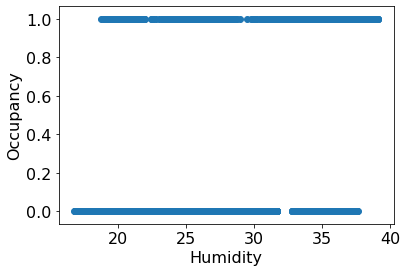

In [76]:
plt.scatter(X_train.T[0], y_train)
plt.xlabel('Humidity', fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [77]:
# GRIDSEARCH
pipe = Pipeline([('classifier' , LogisticRegression())])
# pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create param grid.

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['newton-cg', 'lbfgs','sag', 'saga','liblinear']},
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(X_train, y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 1500 tasks      | elapsed:   34.7s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:   43.9s finished


In [78]:
print(best_clf.best_estimator_)

Pipeline(memory=None,
         steps=[('classifier',
                 LogisticRegression(C=0.0001, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l1', random_state=None,
                                    solver='saga', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)


In [79]:
# extract best estimator

clf = LogisticRegression(C = 0.0001, class_weight = None, dual = False, fit_intercept = True, intercept_scaling = 1, l1_ratio = None, 
                         max_iter = 100, multi_class = 'auto', n_jobs = None, penalty = 'l2', random_state = 0, solver = 'newton-cg', tol = 0.0001, verbose = 0, warm_start = False)
# to test the bestfit
print(best_clf.score(X_test, y_test))
best_clf = clf.fit(X_train, y_train)

0.787556283258289


In [80]:
y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.787556283258289
F1-score [0.88115411 0.        ]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1924
           1       0.00      0.00      0.00       519

    accuracy                           0.79      2443
   macro avg       0.39      0.50      0.44      2443
weighted avg       0.62      0.79      0.69      2443



C:\Users\Ale\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


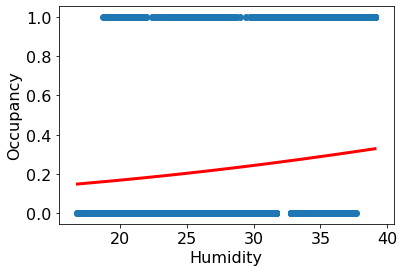

In [81]:
loss = expit(sorted(X_test) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(X_test.T[0]), loss, color='red', linewidth=3)
plt.scatter(X_train, y_train)
plt.xlabel(selected_columns[0], fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

# PROVE ANDATE MALE, DIO MALEDETTO

### MULTIPLE LINEAR REGRESSION

In [85]:
df.head()

,Light,CO2,Humidity,Occupancy
0,426.0,721.25,27.2720,1
1,429.5,714.00,27.2675,1
2,426.0,713.50,27.2450,1
3,426.0,708.25,27.2000,1
4,426.0,704.50,27.2000,1


In [86]:
df = df[['Light', 'CO2', 'Occupancy']]

In [89]:
mlr = LinearRegression(normalize = True)

In [110]:
mlr_ = mlr.fit(df[['Light','CO2']], df['Occupancy'])

In [111]:
# Get the slope and intercept of the line best fit.
print(mlr_.intercept_)

print(mlr_.coef_)

-0.13759717015035478
[0.00163172 0.00025539]


In [95]:
x = df[['Light', 'CO2']].values
y = df.Occupancy.values

In [176]:
x_surf, y_surf = np.meshgrid(np.linspace(int(df.Light.min()), int(df.Light.max())), np.linspace(int(df.CO2.min()), int(df.CO2.max())))
only_x = pd.DataFrame({'Light': x_surf.ravel(), 'CO2' : y_surf.ravel()})
fitted_y = mlr_.predict(only_x)

In [177]:
fitted_y = np.array(fitted_y)

AttributeError: 'AxesSubplot' object has no attribute 'plot_surface'

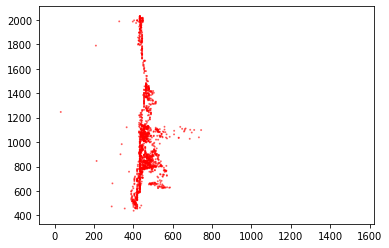

In [178]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(df['Light'], df['CO2'], df['Occupancy'], c = 'red', marker = 'o', alpha = 0.5)
ax.plot_surface(x_surf, y_surf, fitted_y.reshape(x_surf.shape), color = 'None', alpha = 0.3)
ax.set_xlabel('Light')
ax.set_ylabel('CO2')
ax.set_zlabel('Occupancy')
plt.show()

In [179]:
# two arrays - one for each axis
x = np.arange(df.Light.min(), df.Light.max())
y = np.arange(df.CO2.min(), df.CO2.max())

# create a mesh / matrix like object from the arrays
X, Y = np.meshgrid(x, y)
# create Z values - also in a mesh like shape
s = mlr_.intercept_, df.Light.values*mlr_.coef_[0], df.CO2.values*mlr_.coef_[1]
Z = np.sum(s)
# plot!
surface = ax.plot_surface(X, Y, Z)

AttributeError: 'AxesSubplot' object has no attribute 'plot_surface'